# World Happiness Relationships and Visualizations

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [3]:
#Check matplotlib's version
matplotlib.__version__

'3.8.0'

In [4]:
%matplotlib inline

In [5]:
#Creating a path
path = r'/Users/jonahsnewmacbook/Desktop/Data Analytics/Data Immersion/Achievement 6'

### Import the dataframa

In [6]:
WH_15to19 = pd.read_csv(os.path.join(path, 'World Happiness', 'WH_15to19.csv'))

### Exploring Relationships

In [7]:
WH_15to19.head(5)

,Unnamed: 0,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Region
0,0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,Western Europe
1,1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,Western Europe
2,2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,Western Europe
3,3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,Western Europe
4,4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,North America


In [8]:
#Cleaning the dataframe -- Drop columns 'Unnamed:0 and 'Dystopia Residual'
#Drop 'Region', and 'Standard Error'
WHdropunnamed = WH_15to19.drop('Unnamed: 0', axis=1)
WH = WHdropunnamed.drop('Dystopia Residual', axis=1)

In [9]:
# Reason for dropping the columns: Unnamed: 0 isn't important for analysis and Dystopia Residual has 300+ nan.

In [10]:
WH.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,Region
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,Western Europe
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015,Western Europe
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015,Western Europe
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015,Western Europe
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015,North America


In [11]:
#Creating another subset for the correlation matrix heatmap
#Dropping Country, Happiness Rank, Year, and Region
#Dropping multiple columns in one line
columns_to_drop = ['Country', 'Happiness Rank', 'Year', 'Region']
WHheatmap = WH.drop(columns= columns_to_drop, axis=1)

In [12]:
WHheatmap.head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


#### Creating Heatmap Correlation

In [13]:
#Correlation matrix
WHheatmap.corr()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
Happiness Score,1.000000,0.789284,0.648799,0.742456,0.551258,0.398418,0.137578
Economy (GDP per Capita),0.789284,1.000000,0.585966,0.784338,0.340511,0.306307,-0.014560
Family,0.648799,0.585966,1.000000,0.572650,0.420361,0.126401,-0.037262
Health (Life Expectancy),0.742456,0.784338,0.572650,1.000000,0.340745,0.250512,0.010638
Freedom,0.551258,0.340511,0.420361,0.340745,1.000000,0.459593,0.290706
Trust (Government Corruption),0.398418,0.306307,0.126401,0.250512,0.459593,1.000000,0.318920
Generosity,0.137578,-0.014560,-0.037262,0.010638,0.290706,0.318920,1.000000


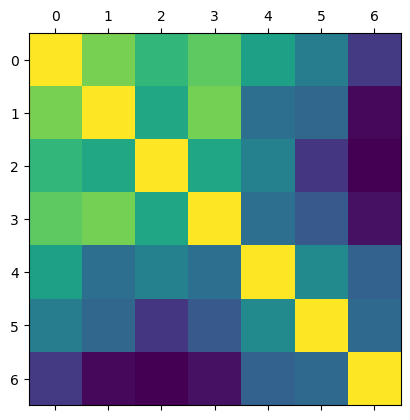

In [14]:
#Now using matplotlib, create heatmap correlation
plt.matshow(WHheatmap.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

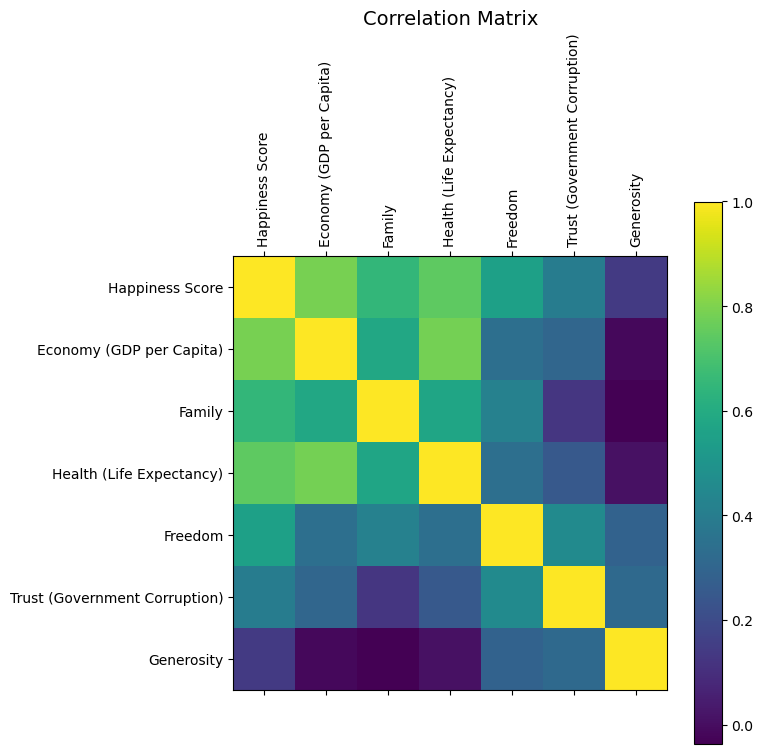

In [15]:
# Adding labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(7, 7)) # figure size 
plt.matshow(WHheatmap.corr(), fignum=f.number) # type of plot
plt.xticks(range(WHheatmap.shape[1]), WHheatmap.columns, fontsize=10, rotation=90) # x axis labels
plt.yticks(range(WHheatmap.shape[1]), WHheatmap.columns, fontsize=10) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=10) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

#### Creating correlation heatmap using seaborn:

In [16]:
WHheatmap.columns

Index(['Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity'],
      dtype='object')

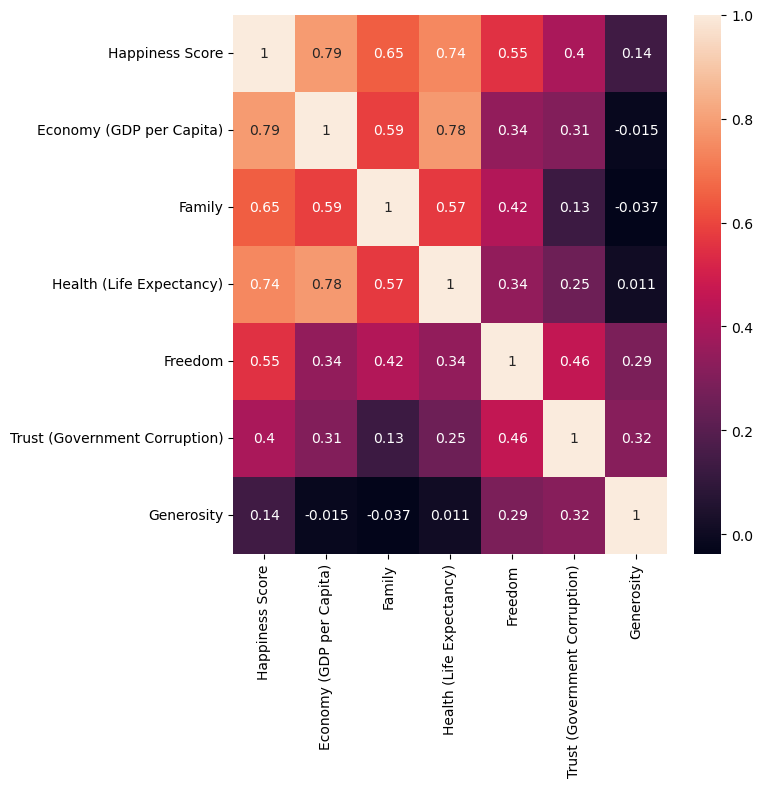

In [17]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(7,7))

# Create the correlation heatmap in seaborn.
corr = sns.heatmap(WHheatmap.corr(), annot = True, ax = ax) 

### Discussing the correlation coefficients between variable
Coefficients can range between -1 to 1, with -1 being the perfect negative relationship and 1 being the perfect positive relationship. 0 means there is no relationship. Positive relationship means that if one variable is up, the other is up as well. Negative relationship means that if one variable is up, the other is down.

#### Scale of the coefficient looks like this:

0: no relationship

0.1 to 0.3: weak relationship

0.3 to 0.6: moderate relationship

0.6 to 1.0: strong relationship

### Let's look at the strong relationships in the plot
There are STRONG relationship between these factors:
- Happiness Score and Economy
- Happiness Score and Family
- Happiness Score and Health (Life Expectancy)
- Economy and Health (Life Expectancy)

### Let's look at no relationship/weak relationship relationships in the plot:
- Trust (Government Corruption) and Economy
- Trust (Government Corruption) and Family
- Trust (Government Corruption) and Health
- Trust (Government Corruption) and Generosity
** Generosity is showing no relationship to weak relationship to all variables. **

### Creating scatterplots for those that has strong relationships

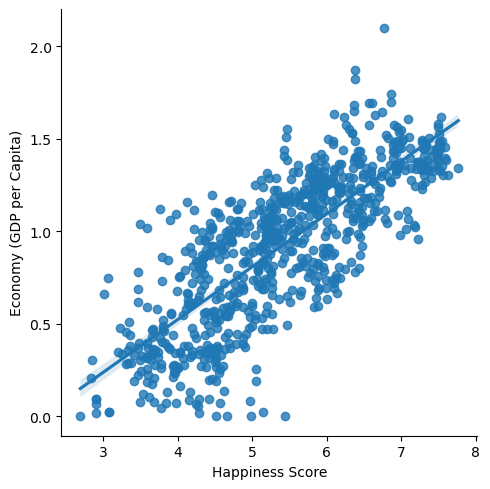

In [20]:
# Create a scatterplot for the "Happiness Score" and "Economy" columns in seaborn

sns.lmplot(x = 'Happiness Score', y = 'Economy (GDP per Capita)', data = WHheatmap)

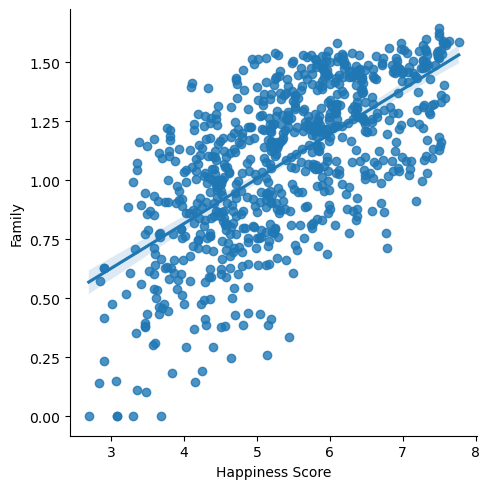

In [21]:
# Create a scatterplot for the "Happiness Score" and "Family" columns in seaborn

sns.lmplot(x = 'Happiness Score', y = 'Family', data = WHheatmap)

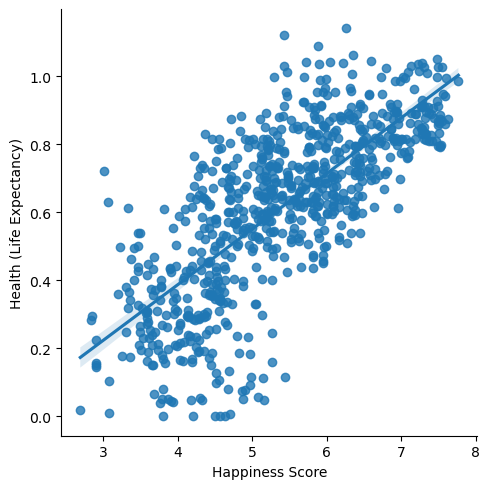

In [23]:
# Create a scatterplot for the "Happiness Score" and "Health (Life Expectancy)" columns in seaborn

sns.lmplot(x = 'Happiness Score', y = 'Health (Life Expectancy)', data = WHheatmap)

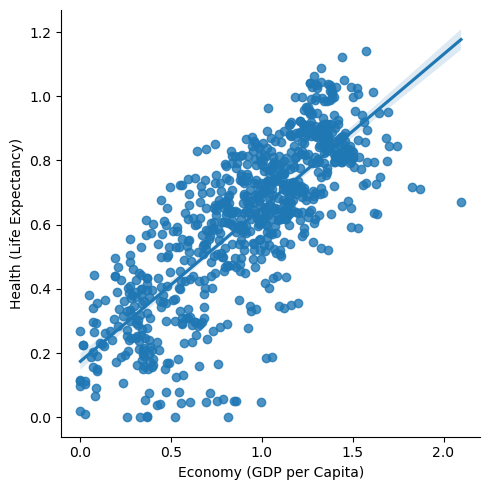

In [24]:
# Create a scatterplot for the "Economy" and "Health (Life Expectancy)" columns in seaborn

sns.lmplot(x = 'Economy (GDP per Capita)', y = 'Health (Life Expectancy)', data = WHheatmap)

### Discussing the output of the scatterplot:

All four scatterplots show strong positive correlations. That means that if one variable is high, the other variable is also high.

### Creating a pair plot of the entire data set

In [25]:
# Select variables that is wanted for the pair plot

WHpairplot = WHheatmap[['Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity']]

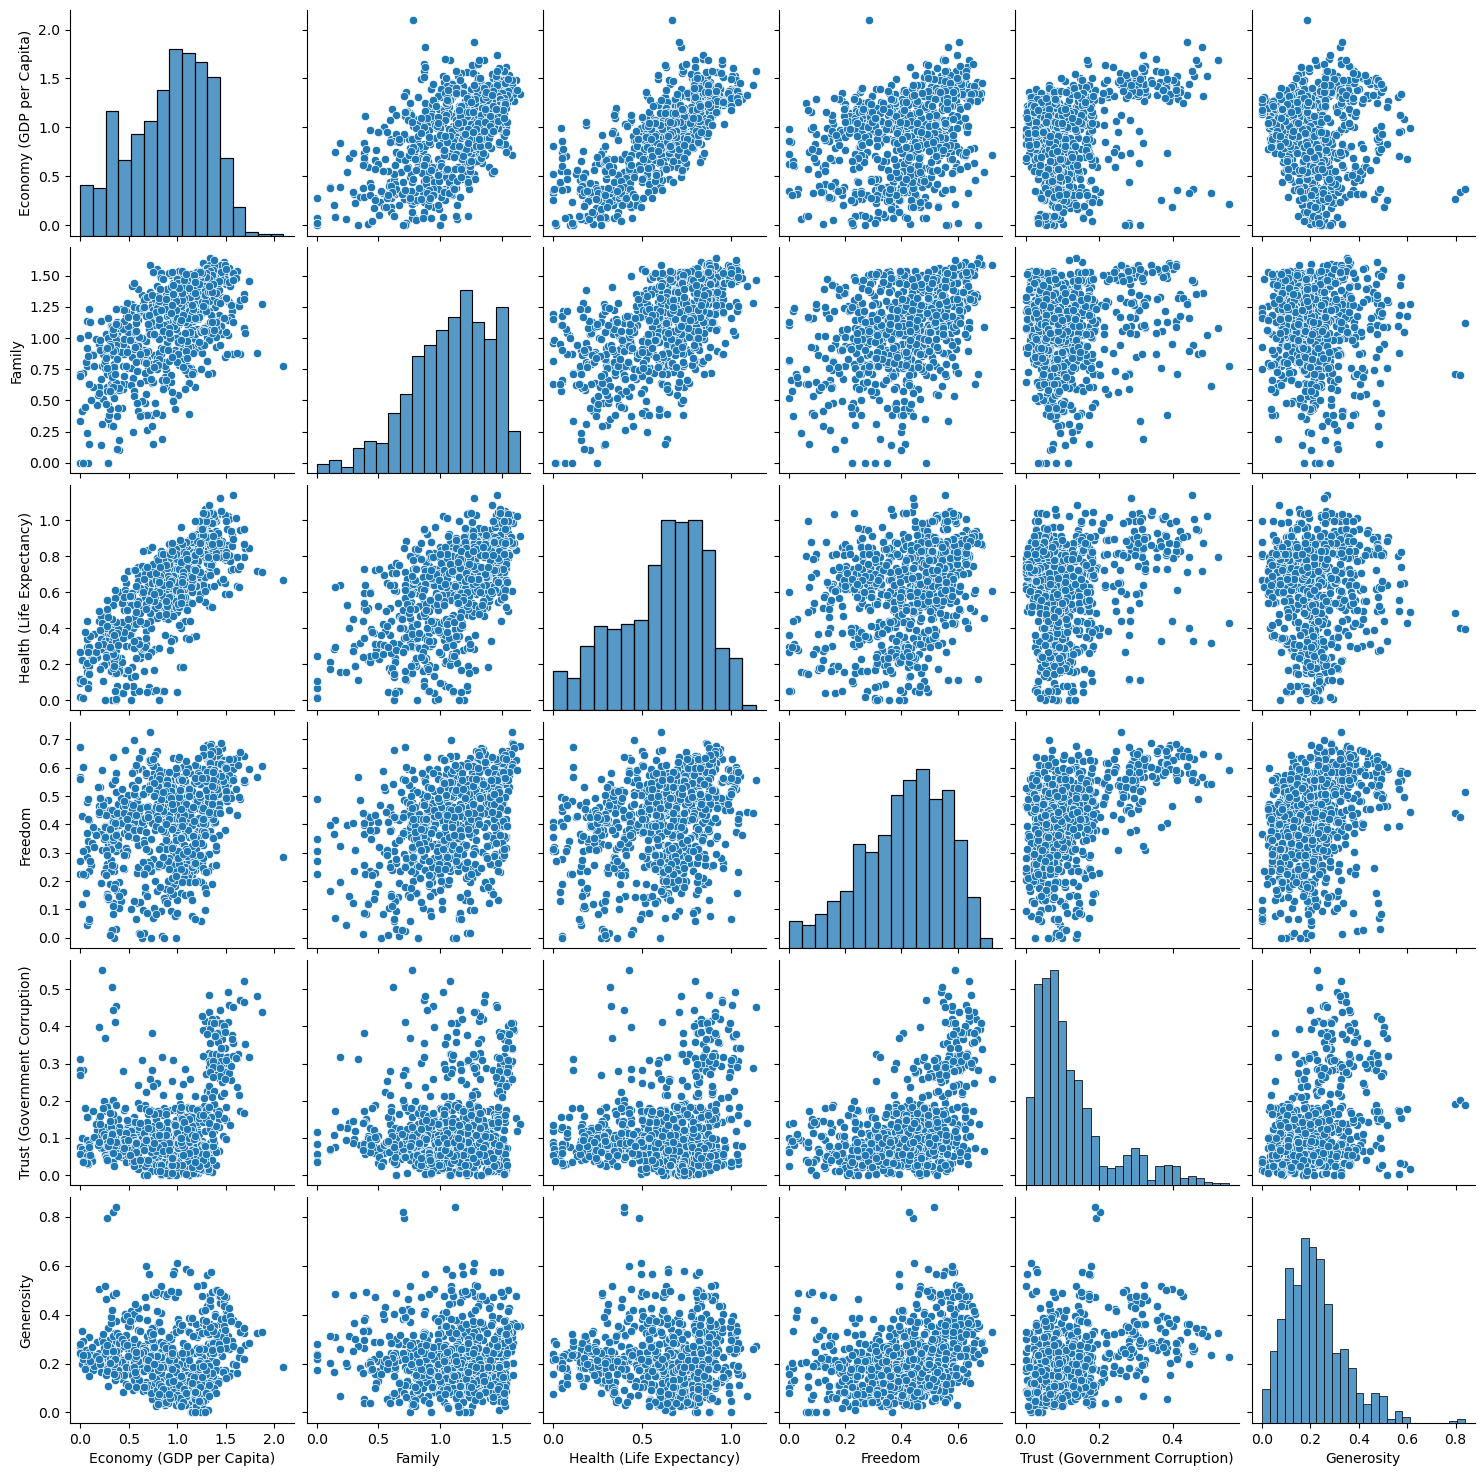

In [26]:
#now create the pair plot
pair = sns.pairplot(WHpairplot)

### Discussing the output of the pair plots:

Pair plot is very similar to the heat map where it shows positive, negative, or no relationship, but shows it in scatterplot instead of numbers.
I would like to focus on numbers with strong positive relationship.

### Creating a Categorical Plots

#### For Happiness Score Categorical Plot

<Axes: xlabel='Happiness Score', ylabel='Count'>

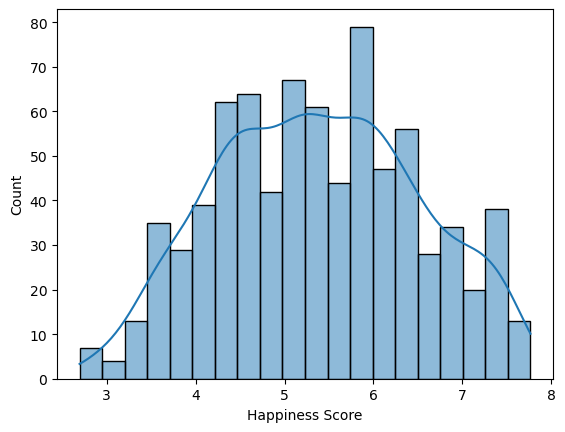

In [27]:
sns.histplot(WH['Happiness Score'], bins = 20, kde = True)

In [30]:
#Creating a Happiness Category
WH.loc[WH['Happiness Score'] < 4, 'Happiness Category'] = 'Low Happiness'
WH.loc[(WH['Happiness Score'] >= 4) & (WH['Happiness Score'] < 6), 'Happiness Category'] = 'Moderate Happiness'
WH.loc[WH['Happiness Score'] >= 6, 'Happiness Category'] = 'High Happiness'

In [32]:
#count on each 'Happiness Category'
WH['Happiness Category'].value_counts(dropna = False)

Happiness Category
Moderate Happiness    451
High Happiness        235
Low Happiness          96
Name: count, dtype: int64

In [33]:
WH.dtypes

Country                           object
Happiness Rank                     int64
Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Year                               int64
Region                            object
Happiness Category                object
dtype: object

### Some of the questions that were answered:
1. Is there Happiness and Economy (GDP per Capita) correlation?
   - Yes, with correlation coefficient of 0.79 there is a strong positive correlation.
2. Is there correlation between Family and Health?
   - With a coefficient of 0.57, there is a moderate relationship between the two variables.
3. How about generosity and economy?
   - With a coefficient of -0.015, this shows that there is no correlation relationship between these two variables.

** Generosity variable shows weak to no relationships with other variables. Correlation is not causation however, it is a curious thing that 4/6 of the variables have no-to-weak relationships. 
### Questions that arised:
    - Generosity has none to weak correlation relationship with other variables. See if Generosity has trends over the years.
### Hypothesis:
- Since there is a strong positive correlation relationship between Happiness and Economy, check over the years between 2015 to 2019 if there has been a drop in economy. Check for when the economy dropped and if the happiness score also dropped.

In [34]:
#Export Data
#exporting this new dataframe
WH.to_csv(os.path.join(path,'World Happiness', 'Scripts Happiness', 'WHVisuals.csv'))